# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

The members of {**2207_NM4**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

 ### COLLABORATORS
- ⚡ Emmanuel Obeng Afari - **Ghana**
- ⚡ Chukwuemeka Okezue - **Nigeria**
- ⚡ Ngawetu Mtirara - **South Africa**
- ⚡ Malik Kabir - **Nigeria**
- ⚡ Mbuyiselo Mkwanazi - **South Africa**
  
Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

# <a id="cont"></a>

## Table of Contents



<a href=#one>1. Predict Introduction </a>

<a href=#two>2. Machine Learning Process</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4.  Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanations</a>

<a href=#nine>9. Conclusion</a>

<a href=#ten>10. References</a>




 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

Although it can still be considered a growing field, there is no doubt that there are many benefits to renwable energy resources. These include generating energy that produces no greenhouse gas emissions from fossil fuels and reduces some types of air pollution. Diversifying energy supply and reducing dependence on imported fuels. Creating economic development and jobs in manufacturing, installation, and more (1). Further it has been proven that fossil fuels are not sustaible. It is not surpring then that there has been a steady increase in the adoption of renewable energy sources in recent years.


In trying to gain deeper understanding of trends and partterns of the country's renwable energy resources and how they compare with fossil fuels, the Spanish govermemnt initated this project. Wherein we were tasked with predicting the shortfall between the energy generated by means of fossil fuels and various renewable sources.

The spanish goverment has been, over a number of years, been tracking the different energy sources utilised in the country. It is that data we will use in coming up with a machine learning model, that would predict the daily energy shortfall for the govermemnt. 

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

<a id="two"></a>
## 2. The Machine Learning Process
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

[2]
![image info](https://cdn-images-1.medium.com/max/1600/1*KzmIUYPmxgEHhXX7SlbP4w.jpeg)

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for data preparation and model building
#import *

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
#from lab_utils_multi import  load_house_data
#from lab_utils_common import dlc
#np.set_printoptions(precision=2)
#plt.style.use('./deeplearning.mplstyle'
# Due to the number of visuals created, this codeblock takes about one minute to run.
from seaborn import pairplot
#g = pairplot(df1.drop('mpg', axis='columns'))
#g.fig.set_size_inches(9,9)
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.

from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
#df_train = pd.read_csv('https://raw.githubusercontent.com/ObengKojo23/Team_NM4/main/data/raw/df_train.csv?token=GHSAT0AAAAAAB2QBLNO7O5JVJW6OUNH6F2GY3GINFA')
df_train = pd.read_csv('C:/Users/Ngawethu Mtirara/Desktop/ML Predict/Data/df_train.csv')
df_train.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train.head()


,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [5]:
#df_test = pd.read_csv('https://raw.githubusercontent.com/ObengKojo23/Team_NM4/main/data/raw/df_test.csv?token=GHSAT0AAAAAAB2QBLNOCHCG53BREQMH37TUY3GIL3Q')
df_test = pd.read_csv('C:/Users/Ngawethu Mtirara/Desktop/ML Predict/Data/df_test.csv')
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [6]:
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test.head()

,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="four"></a>
## 4. Data Processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


## 4.1. Exploratory Data Analysis


 mu = 10673.86 and sigma = 5217.75



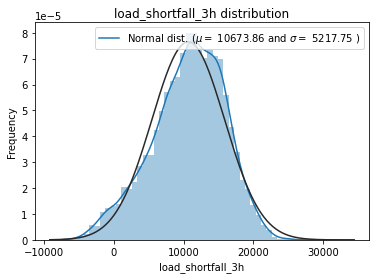

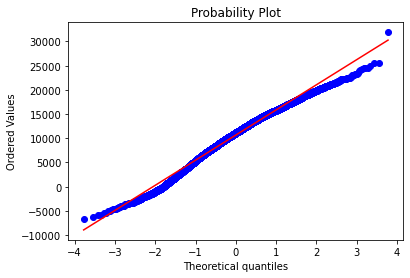

In [7]:
# look at data statistics
sns.distplot(df_train['load_shortfall_3h'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['load_shortfall_3h'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('load_shortfall_3h distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['load_shortfall_3h'], plot=plt)
plt.show()

In [8]:
print(skew(df_train['load_shortfall_3h']))

-0.3847811918590848


In [9]:
# plot relevant feature interactions

In [10]:
# evaluate correlation


In [11]:
abs(df_train.corr()['load_shortfall_3h']).head(3)

Madrid_wind_speed      0.150981
Bilbao_rain_1h         0.152510
Valencia_wind_speed    0.142791
Name: load_shortfall_3h, dtype: float64

<AxesSubplot:>

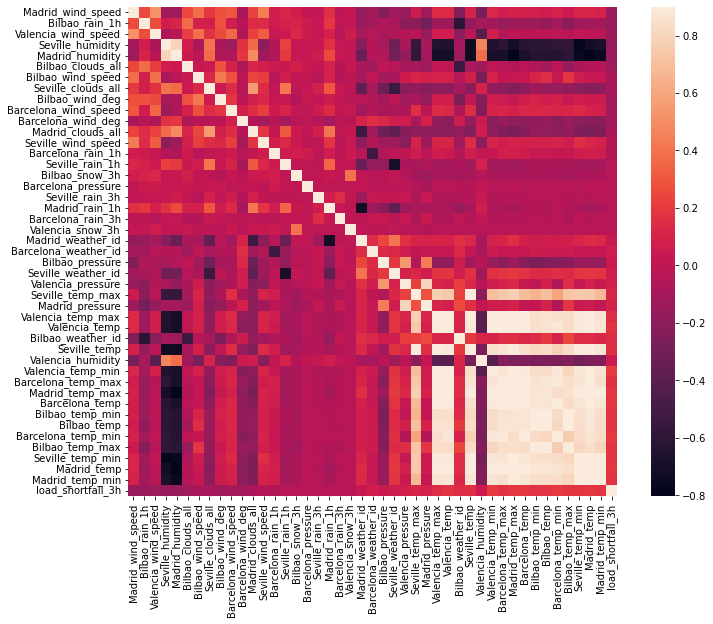

In [12]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [13]:
# have a look at feature distributions

<a id="five"></a>
## 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

## 5.1. Data Cleaning

In [14]:
# remove missing values/ features
# Checking for null values

df_train.isnull().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [15]:
print("Mode")
print(df_train['Valencia_pressure'].mode())

print("Meam")
print(df_train['Valencia_pressure'].mean())

print("Median")
print(df_train['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Meam
1012.0514065222828
Median
1015.0


In [16]:
#Imputing the missing Valencia_Pressure values with their mode
df_train['Valencia_pressure']= df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mode()[0])

## 5.2. Feature Selection

In [17]:
# create new features

In [18]:
# engineer existing features
#changing non numeric columns to numeric
df_train['Valencia_wind_deg']= df_train['Valencia_wind_deg'].str.extract('(\d+)')
df_train['Valencia_wind_deg']= pd.to_numeric(df_train['Valencia_wind_deg'])

df_train.Seville_pressure = df_train.Seville_pressure.str.extract('(\d+)')
df_train.Seville_pressure = pd.to_numeric(df_train.Seville_pressure)

In [19]:
#Fixing the timedate feature so it can be used in the models

df_train['time'] = pd.to_datetime(df_train['time'])

df_train['date_year'] = df_train['time'].dt.year 
df_train['date_month_no'] = df_train['time'].dt.month
df_train['date_day'] = df_train['time'].dt.day

df_train['hour'] = df_train['time'].dt.hour
df_train = df_train.drop(['time'], axis = 1)

In [23]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
Valencia_snow_3h,63.287249
Barcelona_pressure,57.969739
Bilbao_snow_3h,26.173087
Seville_rain_3h,19.339263
Barcelona_rain_3h,12.694432
Barcelona_rain_1h,8.725494
Seville_rain_1h,8.065960
Madrid_rain_1h,7.073097
Bilbao_rain_1h,5.221908
Valencia_wind_speed,3.499037


skewness = 0 : normally distributed.

skewness > 0 : more weight in the left tail of the distribution.

skewness < 0 : more weight in the right tail of the distribution.

#### Box Cox Transformation of (highly) skewed features

We use the scipy  function boxcox1p which computes the Box-Cox transformation of **\\(1 + x\\)**. 

See [3] for more details on Box Cox Transformation as well as [4]

#### WIll run this later. Skipping for now
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    df_train[feat] = boxcox1p(df_train[feat], lam)

In [24]:
df_train.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,date_year,date_month_no,date_day,hour
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.0,0.0,223.333333,...,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,2015,1,1,3
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.0,0.0,221.000000,...,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,2015,1,1,6
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.0,0.0,214.333333,...,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,2015,1,1,9


In [25]:
clean_train = df_train

### Data processing for test data

The same step for done to process the train data set were repeated for the test data set

In [26]:
# remove missing values/ features
# Checking for null values

df_test.isnull().sum()

time                      0
Madrid_wind_speed         0
Valencia_wind_deg         0
Bilbao_rain_1h            0
Valencia_wind_speed       0
Seville_humidity          0
Madrid_humidity           0
Bilbao_clouds_all         0
Bilbao_wind_speed         0
Seville_clouds_all        0
Bilbao_wind_deg           0
Barcelona_wind_speed      0
Barcelona_wind_deg        0
Madrid_clouds_all         0
Seville_wind_speed        0
Barcelona_rain_1h         0
Seville_pressure          0
Seville_rain_1h           0
Bilbao_snow_3h            0
Barcelona_pressure        0
Seville_rain_3h           0
Madrid_rain_1h            0
Barcelona_rain_3h         0
Valencia_snow_3h          0
Madrid_weather_id         0
Barcelona_weather_id      0
Bilbao_pressure           0
Seville_weather_id        0
Valencia_pressure       454
Seville_temp_max          0
Madrid_pressure           0
Valencia_temp_max         0
Valencia_temp             0
Bilbao_weather_id         0
Seville_temp              0
Valencia_humidity   

In [27]:
print("Mode")
print(df_test['Valencia_pressure'].mode())

print("Meam")
print(df_test['Valencia_pressure'].mean())

print("Median")
print(df_test['Valencia_pressure'].median())

Mode
0    1016.0
Name: Valencia_pressure, dtype: float64
Meam
1013.1483509056495
Median
1014.6666666667


In [28]:
df_test['Valencia_pressure']= df_test['Valencia_pressure'].fillna(df_test['Valencia_pressure'].mode()[0])

In [29]:
df_test['Valencia_wind_deg']= df_test['Valencia_wind_deg'].str.extract('(\d+)')
df_test['Valencia_wind_deg']= pd.to_numeric(df_test['Valencia_wind_deg'])

In [30]:
df_test.Seville_pressure = df_test.Seville_pressure.str.extract('(\d+)')
df_test.Seville_pressure = pd.to_numeric(df_test.Seville_pressure)

In [31]:
df_test['time'] = pd.to_datetime(df_test['time'])

df_test['date_year'] = df_test['time'].dt.year 
df_test['date_month_no'] = df_test['time'].dt.month
df_test['date_day'] = df_test['time'].dt.day

df_test['hour'] = df_test['time'].dt.hour
df_test = df_test.drop(['time'], axis = 1)

In [32]:
df_test.head(3)

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,date_year,date_month_no,date_day,hour
0,5.000000,8,0.0,5.000000,87.0,71.333333,20.0,3.000000,0.000000,193.333333,...,280.380000,286.816667,285.15,283.150000,279.866667,279.15,2018,1,1,0
1,4.666667,8,0.0,5.333333,89.0,78.000000,0.0,3.666667,0.000000,143.333333,...,281.010000,283.483333,284.15,281.150000,279.193333,278.15,2018,1,1,3
2,2.333333,7,0.0,5.000000,89.0,89.666667,0.0,2.333333,6.666667,130.000000,...,279.196667,281.816667,282.15,280.483333,276.340000,276.15,2018,1,1,6


In [33]:
clean_test = df_test

In [34]:
print(clean_train.shape)
print(clean_test.shape)

(8763, 51)
(2920, 50)


<a id="six"></a>
## 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

We use the **cross_val_score** function of Sklearn. However this function has not a shuffle attribut, we add then one line of code,  in order to shuffle the dataset  prior to cross-validation

In [35]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(clean_train.values)
    rmse= np.sqrt(-cross_val_score(model, clean_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

The data is split for Hold-out_validation

In [36]:
# Split the data into X & y

y_train = clean_train.load_shortfall_3h.values
clean_train = clean_train.drop(['load_shortfall_3h'], axis=1)


In [37]:
# split data

#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

### Base Models

#### 1. Gradient Boosting Regression :

In [38]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

#### 2. XGBoost :

In [39]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

#### 3. LightGBM :

In [40]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

#### 4. RandomForest

In [41]:
#Add more models

<a id="seven"></a>
## 7. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

The perfomance of the the base models were evaluated using the cross-validation rmsle error

In [42]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 4164.1072 (121.5695)



In [43]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[07:34:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[07:34:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0ac76685cf763591d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

Xgboost score: 4170.

In [44]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

<a id="eight"></a>
## 8. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
 

#### 8.1. Gradient Boosting Regression 

#### 8.2. XGBoost 

#### 8.3. LightGBM

#### 8.4. Random Forest

#### Chosen Model :

In [20]:
# discuss chosen methods logic

<a id="nine"></a>
## 9. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |


<a id="ten"></a>
## 10. Referencess
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |


[1] Environmental Protection Agency. (n.d.). EPA. Retrieved November 4, 2022, from https://www.epa.gov/statelocalenergy/local-renewable-energy-benefits-and-resources 

[2] Centric Consulting (2021) Machine learning: A quick introduction and five core steps, Centric Consulting. Available at: https://centricconsulting.com/blog/machine-learning-a-quick-introduction-and-five-core-steps/ (Accessed: November 4, 2022). 

[3] http://onlinestatbook.com/2/transformations/box-cox.html

[4] https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html